In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


# Acceleration Data

In [2]:
accdata = pd.read_csv('all_accelerometer_data_pids_13.csv')

In [3]:
accdata.head(5)

,time,pid,x,y,z
0,0,JB3156,0.0000,0.0000,0.0000
1,0,CC6740,0.0000,0.0000,0.0000
2,1493733882409,SA0297,0.0758,0.0273,-0.0102
3,1493733882455,SA0297,-0.0359,0.0794,0.0037
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163


In [4]:
# Dropping time = 0 columns
accdata = accdata.drop(accdata[accdata['time']==0].index)

In [5]:
# converting unix to datetime
accdata.loc[:,'time'] = pd.to_datetime(accdata.loc[:,'time'],unit='ms')

In [6]:

accdata['time']=accdata['time'].dt.floor('s')

In [7]:
accdata.reset_index(drop=True,inplace=True)

### Assigning all acceleration data to their respective variables

In [8]:
pids = ['BK7610','BU4707','CC6740','DC6359','DK3500','HV0618','JB3156','JR8022','MC7070','MJ8002','PC6771','SA0297','SF3079']

In [9]:
for i in pids:
    locals()[i] = accdata[accdata['pid']==str(i)]

In [10]:
pid = [BK7610,BU4707,CC6740,DC6359,DK3500,HV0618,JB3156,JR8022,MC7070,MJ8002,PC6771,SA0297,SF3079]

In [11]:
for i in pid:
    i.drop('pid',axis=1,inplace = True)
    i.reset_index(drop=True,inplace=True)

/tmp/ipykernel_13317/914698183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop('pid',axis=1,inplace = True)
/tmp/ipykernel_13317/914698183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop('pid',axis=1,inplace = True)
/tmp/ipykernel_13317/914698183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop('pid',axis=1,inplace = True)
/tmp/ipykernel_13317/914698183.py:2: SettingWithCopyWarning: 
A value is trying to

In [12]:
BK7610 = BK7610.groupby(['time'],as_index=False)[['x','y','z']].mean()
BU4707 = BU4707.groupby(['time'],as_index=False)[['x','y','z']].mean()
CC6740 = CC6740.groupby(['time'],as_index=False)[['x','y','z']].mean()
DC6359 = DC6359.groupby(['time'],as_index=False)[['x','y','z']].mean()
DK3500 = DK3500.groupby(['time'],as_index=False)[['x','y','z']].mean()
HV0618 = HV0618.groupby(['time'],as_index=False)[['x','y','z']].mean()
JB3156 = JB3156.groupby(['time'],as_index=False)[['x','y','z']].mean()
JR8022 = JR8022.groupby(['time'],as_index=False)[['x','y','z']].mean()
MC7070 = MC7070.groupby(['time'],as_index=False)[['x','y','z']].mean()
MJ8002 = MJ8002.groupby(['time'],as_index=False)[['x','y','z']].mean()
PC6771 = PC6771.groupby(['time'],as_index=False)[['x','y','z']].mean()
SA0297 = SA0297.groupby(['time'],as_index=False)[['x','y','z']].mean()
SF3079 = SF3079.groupby(['time'],as_index=False)[['x','y','z']].mean()

TAC plots against time

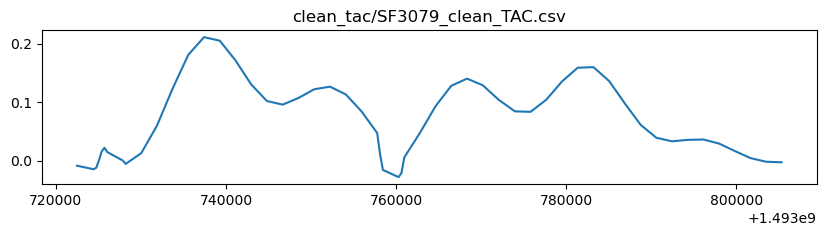

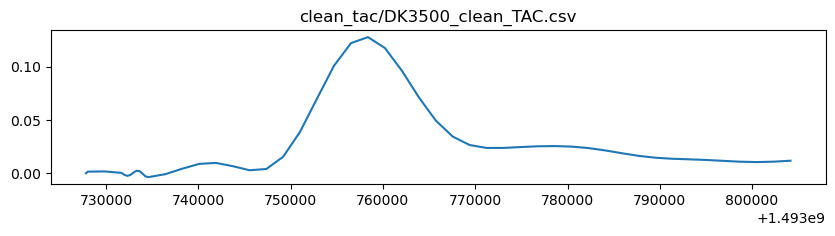

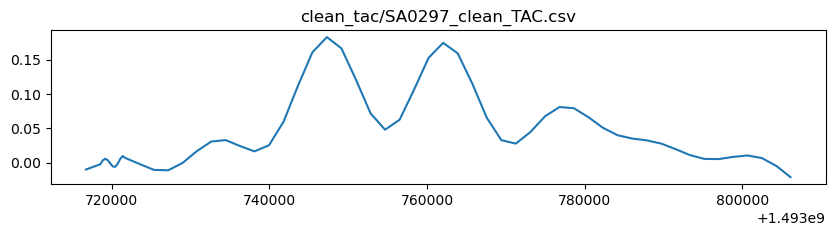

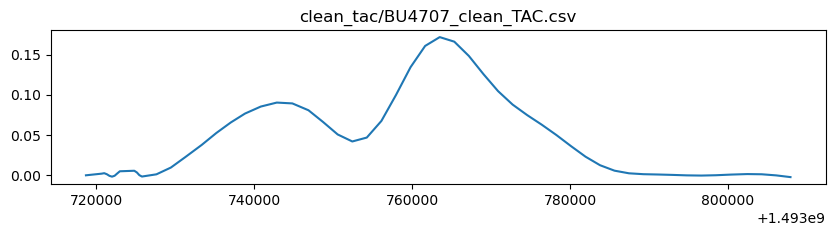

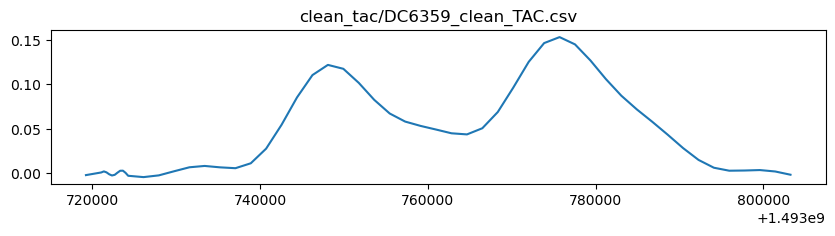

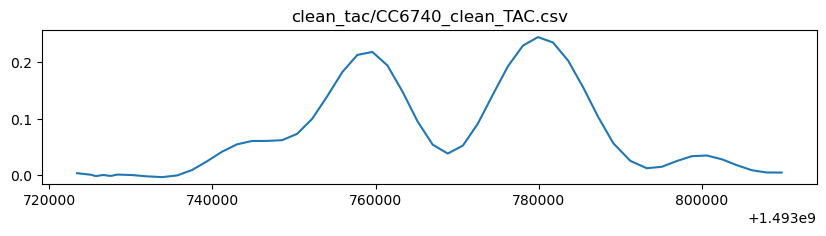

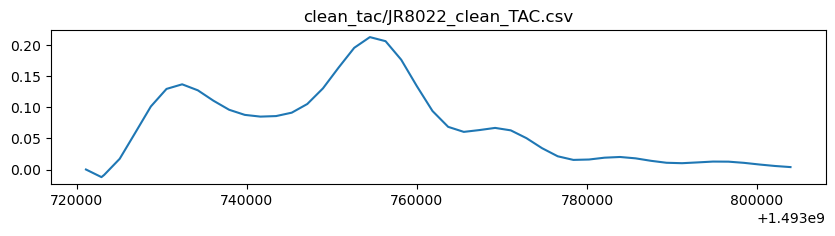

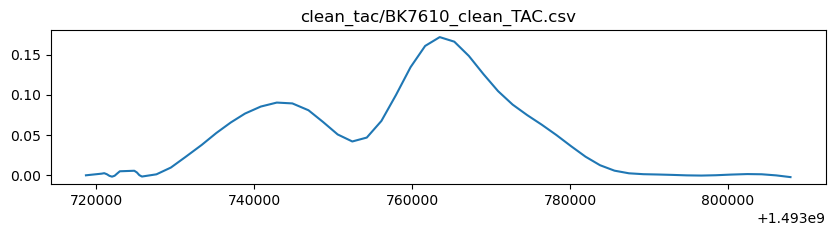

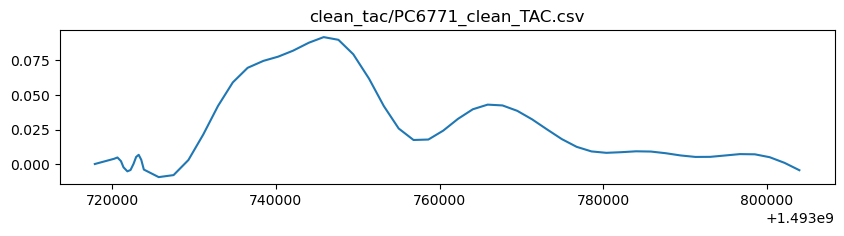

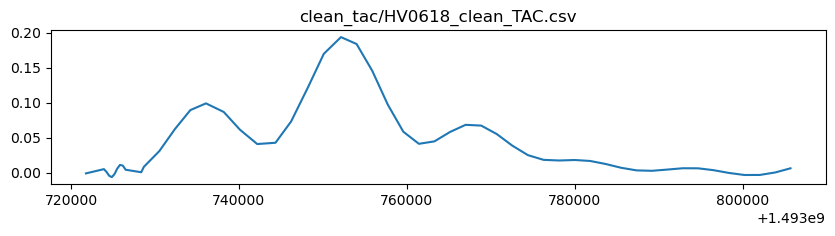

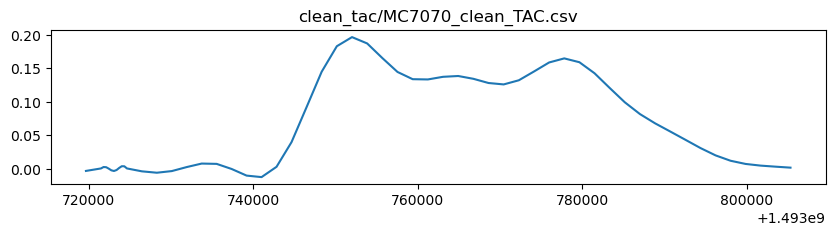

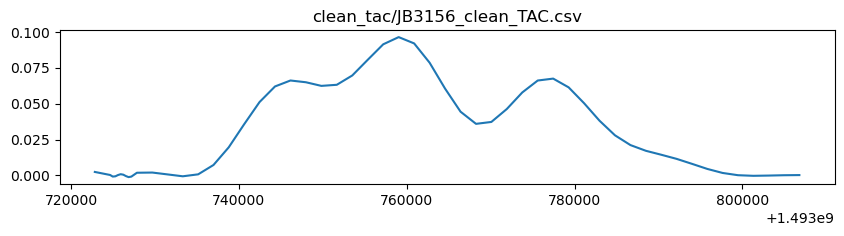

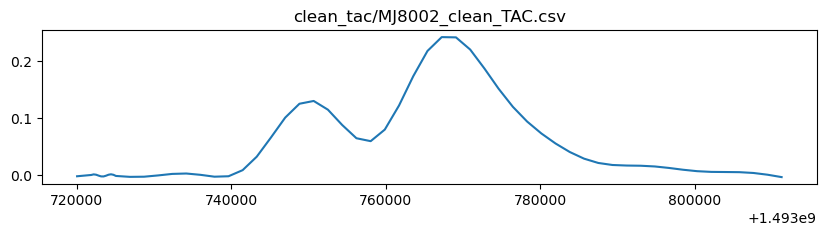

In [13]:
import os
import glob
  
  
# use glob to get all the csv files 
# in the folder
path = 'clean_tac'
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
  
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
    timestamp = df['timestamp']
    TAC_Reading = df['TAC_Reading']
    plt.figure(figsize=(10,2))
    plt.plot(timestamp,TAC_Reading)
    plt.title(f)
    plt.show()


### Feature Extraction

In [14]:
%run feature_extraction

<Figure size 640x480 with 0 Axes>

In [15]:
pid = [BK7610,BU4707,CC6740,DC6359,DK3500,HV0618,JB3156,JR8022,MC7070,MJ8002,PC6771,SA0297,SF3079]

In [16]:
for i in pid:
    acceleration(i)
    high_pass(i)
    thresholding(i)
    step_time(i)

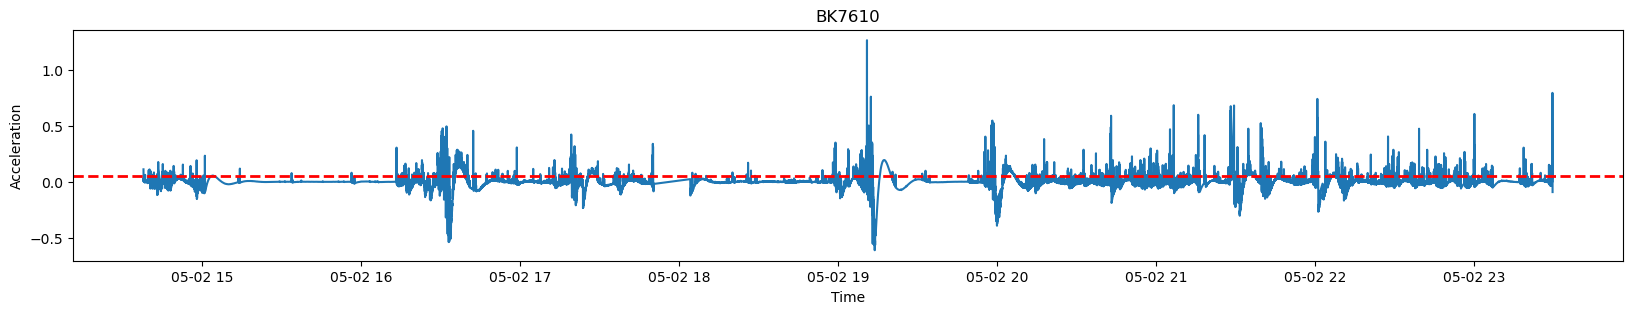

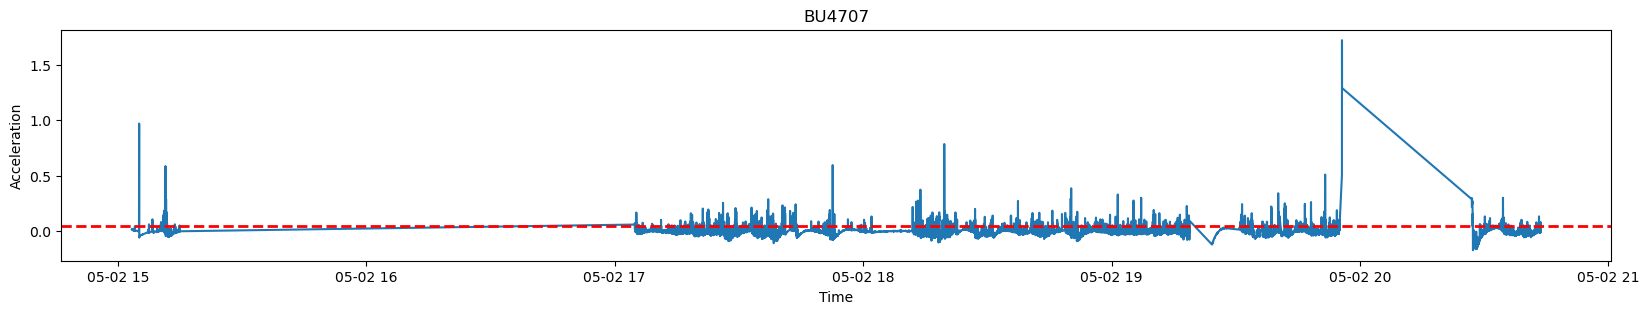

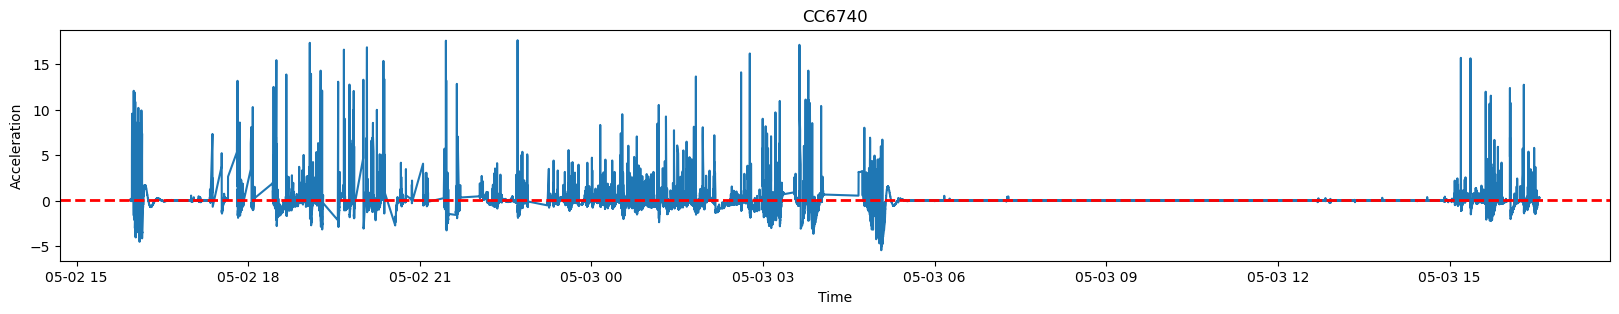

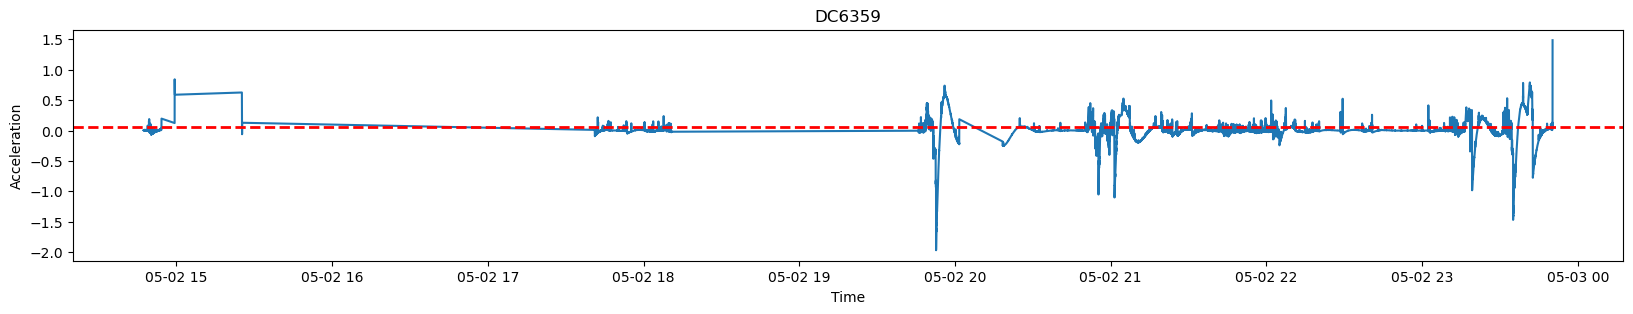

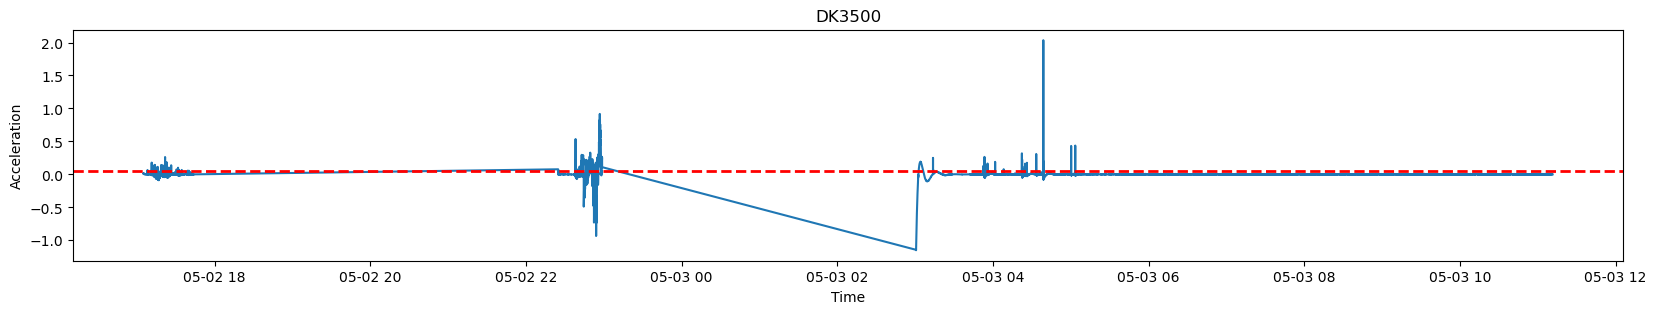

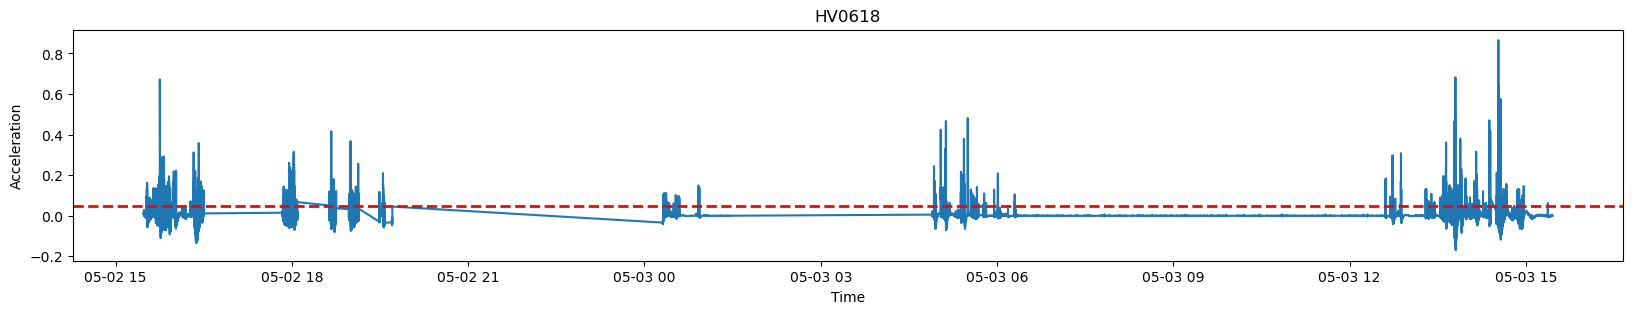

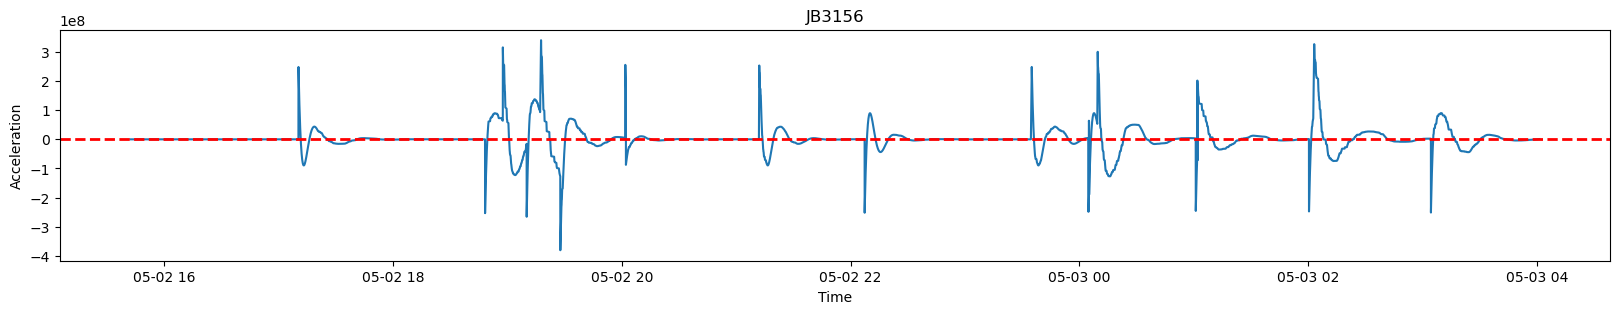

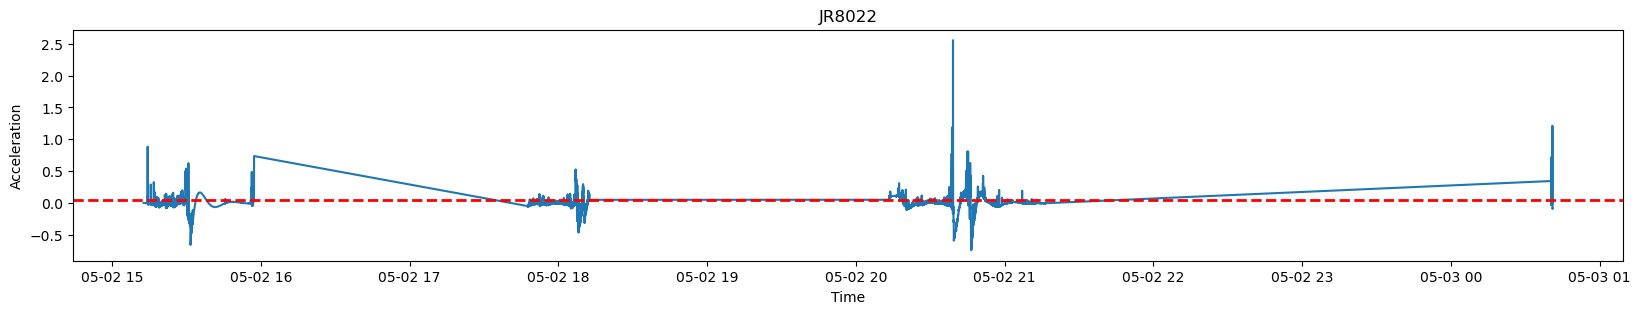

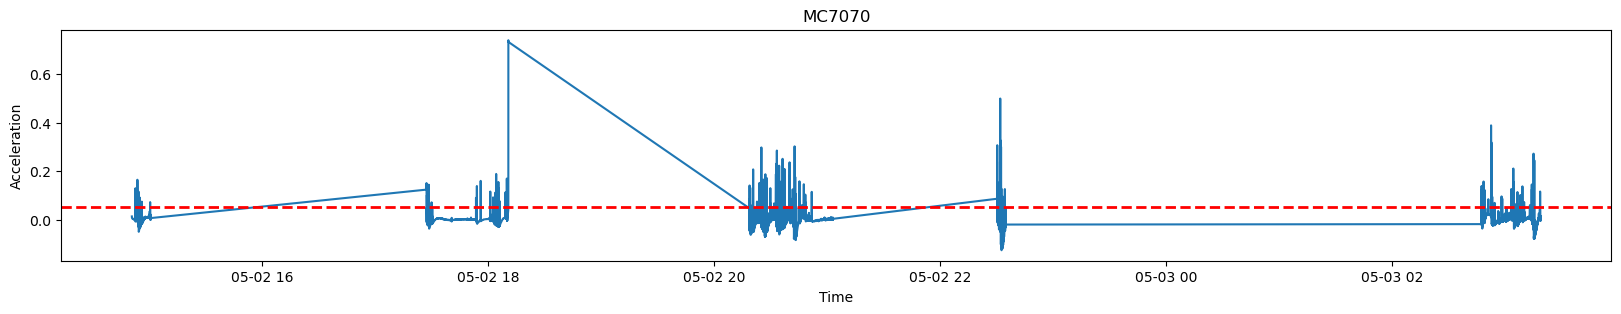

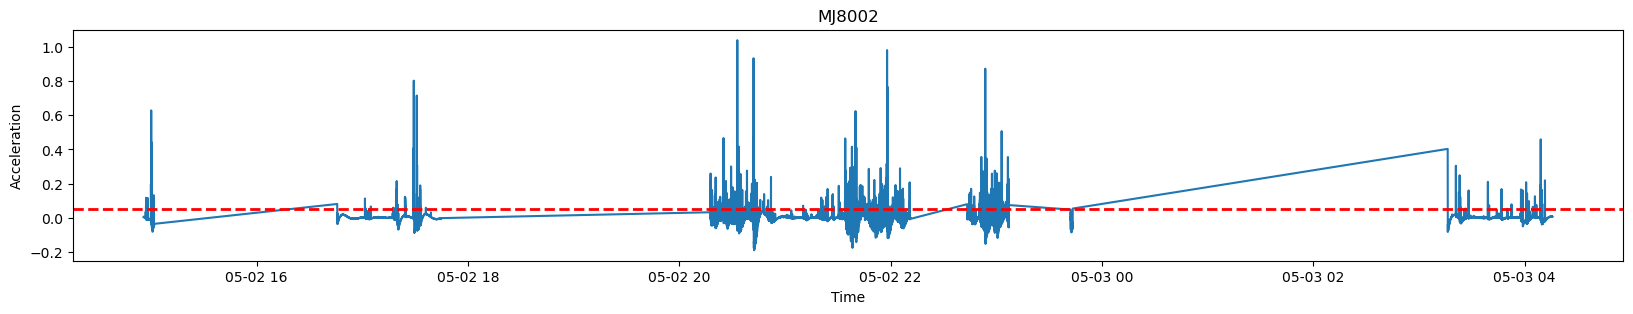

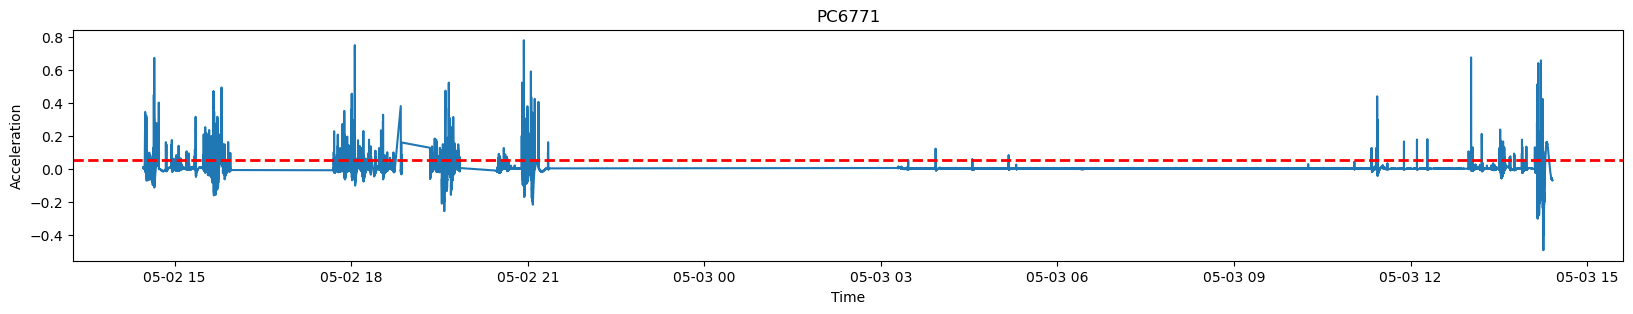

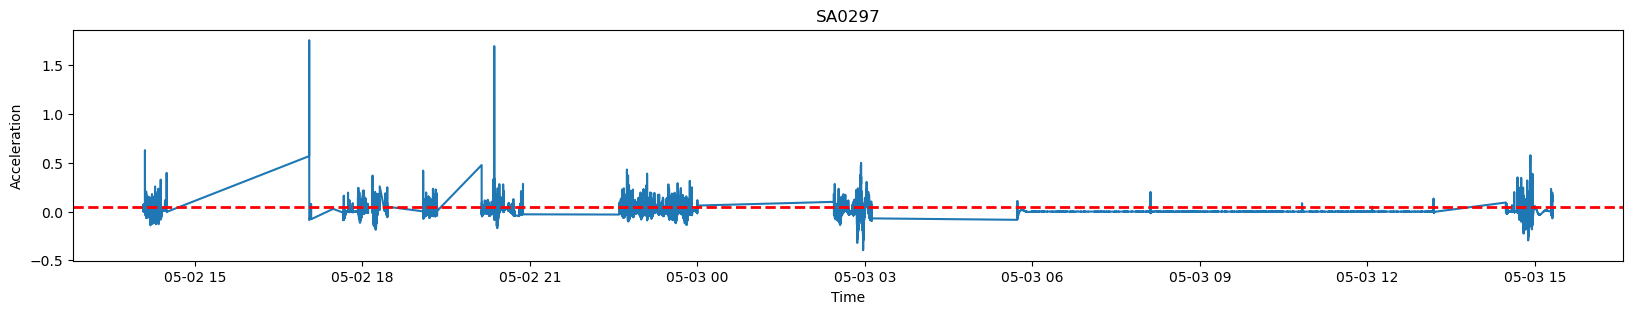

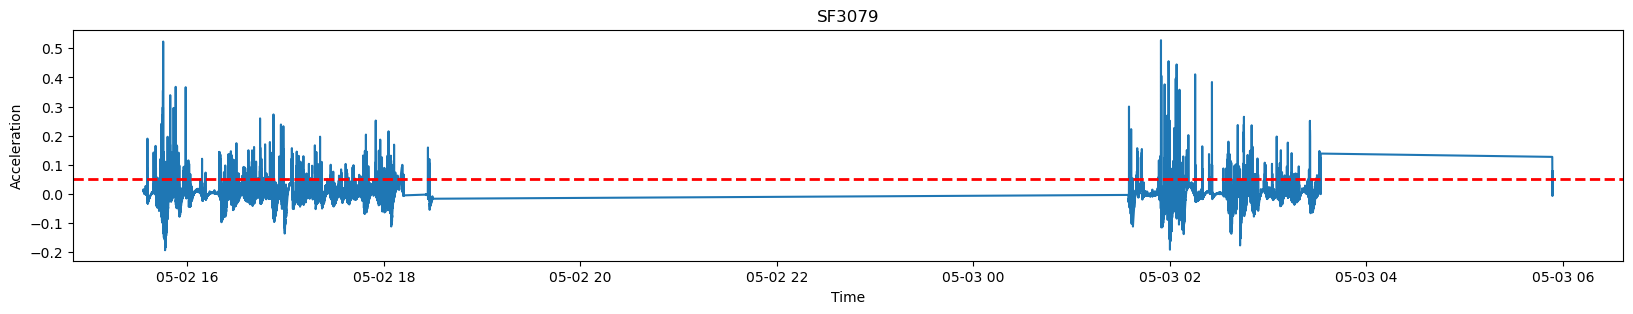

In [17]:
pid = [BK7610,BU4707,CC6740,DC6359,DK3500,HV0618,JB3156,JR8022,MC7070,MJ8002,PC6771,SA0297,SF3079]
for i,j in zip(pid,pids):
    plt.figure(figsize=(20,3))
    plt.plot(i['time'],i['acc'])
    plt.axhline(y=0.05, color='r', linestyle='--', linewidth=2) 
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.title(j)

Cleaning and adding TAC data to their respective dataframes

In [18]:
pid = [BK7610,BU4707,CC6740,DC6359,DK3500,HV0618,JB3156,JR8022,MC7070,MJ8002,PC6771,SA0297,SF3079]
for i,j in zip(pid,pids):
    y = pd.read_csv('clean_tac/'+j+'_clean_TAC.csv')
    x = i.copy()
    
    # converting unix to datetime
    y['time']=pd.to_datetime(y.loc[:,'timestamp'],unit='s')

    y.drop('timestamp',axis=1,inplace=True)
    x.drop(['x','y','z'],axis=1,inplace=True)

    x = pd.merge(x,y,on='time',how='left')
    x['TAC_Reading'] = x['TAC_Reading'].interpolate(method='linear',limit_direction='both')

    x.set_index('time',inplace=True,drop=True)


    x['TAC_Reading'] = np.where(x['TAC_Reading'] < 0.08, 0, 1)
    locals()[j] = x
    

In [19]:
pid = [BK7610,BU4707,CC6740,DC6359,DK3500,HV0618,JB3156,JR8022,MC7070,MJ8002,PC6771,SA0297,SF3079]
for i,j in zip(pid,pids):
    print(j)
    print(i['TAC_Reading'].value_counts(normalize=True))

BK7610
1    0.58627
0    0.41373
Name: TAC_Reading, dtype: float64
BU4707
0    0.744167
1    0.255833
Name: TAC_Reading, dtype: float64
CC6740
0    0.817694
1    0.182306
Name: TAC_Reading, dtype: float64
DC6359
0    0.794055
1    0.205945
Name: TAC_Reading, dtype: float64
DK3500
0    1.0
Name: TAC_Reading, dtype: float64
HV0618
0    0.953774
1    0.046226
Name: TAC_Reading, dtype: float64
JB3156
0    0.825025
1    0.174975
Name: TAC_Reading, dtype: float64
JR8022
1    1.0
Name: TAC_Reading, dtype: float64
MC7070
1    1.0
Name: TAC_Reading, dtype: float64
MJ8002
0    0.547101
1    0.452899
Name: TAC_Reading, dtype: float64
PC6771
0    0.97128
1    0.02872
Name: TAC_Reading, dtype: float64
SA0297
0    0.839277
1    0.160723
Name: TAC_Reading, dtype: float64
SF3079
1    1.0
Name: TAC_Reading, dtype: float64


In [20]:
pid = [BK7610,BU4707,CC6740,DC6359,DK3500,HV0618,JB3156,JR8022,MC7070,MJ8002,PC6771,SA0297,SF3079]
final = pd.concat(pid,ignore_index=True)

In [21]:
final['TAC_Reading'].value_counts(normalize=True)

0    0.757119
1    0.242881
Name: TAC_Reading, dtype: float64

In [22]:
%run model_building

<Figure size 640x480 with 0 Axes>

In [23]:
model_building(final)

,Model,Train Accuracy,Train Recall,Train Precision,Train F1 Score,Test Accuracy,Test Recall,Test Precision,Test F1 Score
0,Logistic,0.718038,0.344835,0.406069,0.372955,0.718605,0.347475,0.405586,0.374288
1,Logistic ROC,0.680234,0.660185,0.403691,0.501019,0.679412,0.657065,0.401209,0.498208
